# Cargar BD de Keras

## Librerias

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

2024-10-31 12:59:53.786669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 12:59:54.370711: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 12:59:55.082377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730397595.400884   15966 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730397595.558100   15966 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 12:59:55.805636: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## BD Cifar 100

Importamos esta BD de Keras

In [2]:
from tensorflow.keras.datasets import cifar100

Asignamos a dos tuplas los valores de entrenamiento y prueba

In [3]:
# label_mode='fine' para cargar las subclases
# label_mode='coarse' para cargar las clases
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 140s 1us/step


Mostramos las dimensiones del dataframe de entrenamiento

In [4]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


> Hay 50.000 imagenes de 32x32 pixeles.

> Hay 50.000 imagenes de 1 dimension.

Visualizamos una imagen de la BD, en esta caso la correspondiente al registro 40

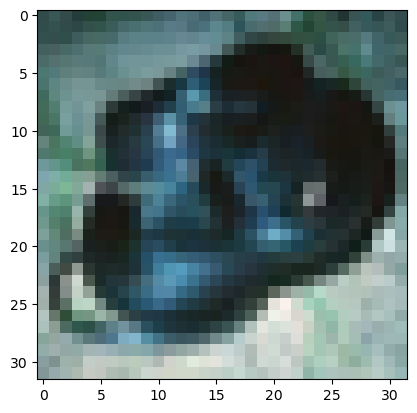

In [5]:
num_img = 40
plt.imshow(x_train[num_img])
plt.show()

Procedemos a buscar la etiqueta a la que pertenece dicha imagen. Para ello, mostramos el indice de la etiqueta en y_train

In [6]:
print(y_train[num_img])

[78]


El indice de la etiqueta es 78. Debemos cargar el archivo que contiene las etiquetas junto a sus respectivos indices para luego buscar el de nuestro interes

In [ ]:
#!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/cifar100_labels.json \ -O ./cifar100_labels/cifar100_labels.json

--2024-10-31 13:14:27--  https://storage.googleapis.com/platzi-tf2/cifar100_labels.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.78.91, 142.250.78.123, 142.250.78.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.78.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1436 (1.4K) [application/json]
Saving to: ‘cifar100_labels.json’

cifar100_labels.jso 100%[===================>]   1.40K  --.-KB/s    in 0s      

2024-10-31 13:14:28 (6.86 MB/s) - ‘cifar100_labels.json’ saved [1436/1436]

--2024-10-31 13:14:28--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
--2024-10-31 13:14:28--  http://./cifar100_labels/cifar100_labels.json
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2024-10-31 13:14:30--
Total wall clock time: 2.6s
Downloaded: 1 files, 1.4K in 0s (6.86 MB/s)


Deserializamos el json con las etiquetas dadas

In [8]:
import json

with open('./cifar100_labels/cifar100_labels.json', 'r') as fine_labels:
    cifar100_labels = json.load(fine_labels)

Finalmente, mostramos la imagen anterior pero esta vez con su respectiva etiqueta

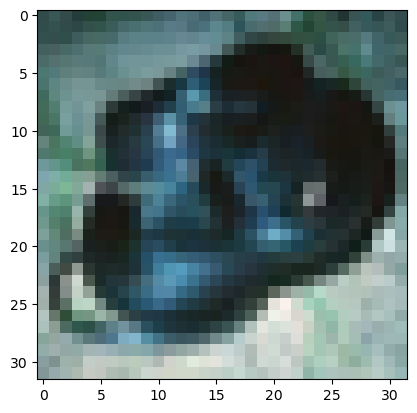

snake


In [9]:
num_img = 40
num_label = 78

plt.imshow(x_train[num_img])
plt.show()

print(cifar100_labels[num_label])

> La imagen corresponde a una serpiente.

Busquemos otra imagen, en este caso la que corresponde al registro 112

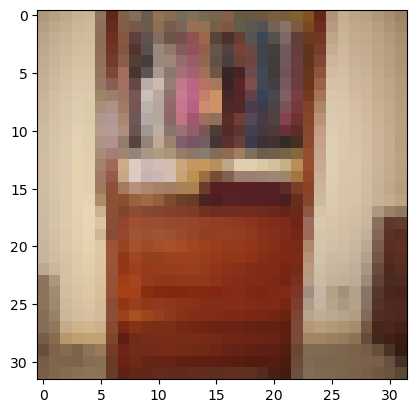

wardrobe


In [14]:
num_img = 112
plt.imshow(x_train[num_img])
plt.show()

num_label = int(y_train[num_img][0])
print(cifar100_labels[num_label])

## BD MNIST

Importamos la BD de MNIST desde Keras

In [15]:
from tensorflow.keras.datasets import mnist

Guardamos los datos de prueba y de entrenamiento en un par de tuplas

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Verificamos las dimensiones de los datos de entrenamiento

In [17]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


> Hay 60.000 imagenes de 28x28

> Hay 60.000 etiquetas

Visualizamos una de las imagenes de la BD, en este caso la que corresponde al registro 40 junto a su respectiva etiqueta.

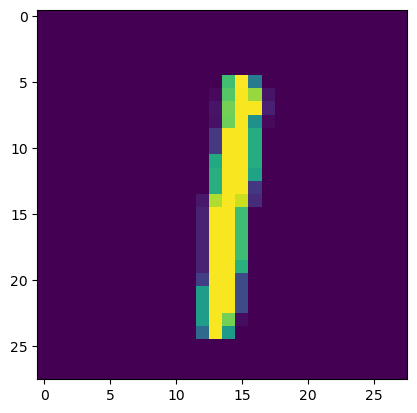

1


In [18]:
num_img = 40
plt.imshow(x_train[num_img])
plt.show()

print(y_train[num_img])

> La imagen corresponde al numero 1.

## BD Fashion MNIST

Vamos a cargar la BD de Fashion MNIST de keras

In [19]:
from tensorflow.keras.datasets import fashion_mnist

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Mostramos las dimensiones de los datos de entrenamiento

In [21]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


> Hay 60.000 imagenes de 28x28

> Hay 60.000 etiquetas

Visualicemos una imagen de la BD, en este caso la correspondiente al registro 112

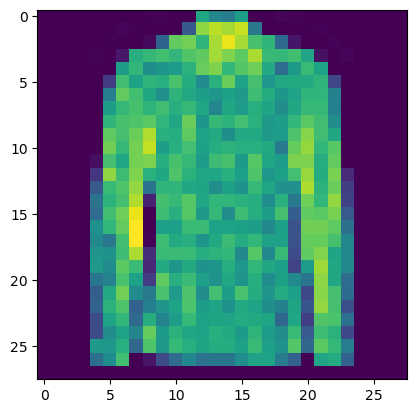

6


In [22]:
num_img = 112
plt.imshow(x_train[num_img])
plt.show()

# etiqueta
print(y_train[num_img])

Nos arroja el indice de la etiqueta. Para mostrar la etiqueta, creamos un diccionario con las etiquetas y sus correspondientes indices.

In [23]:
labels_names = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

Una vez mas, mostramos la imagen seleccionada junto a su respectiva etiqueta

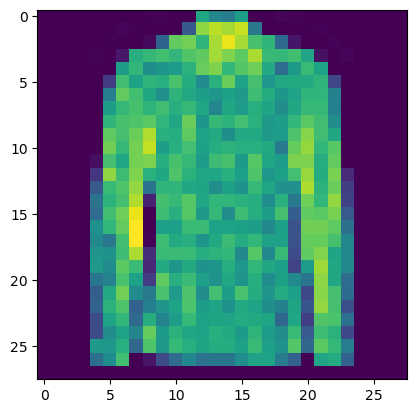

Shirt


In [24]:
num_img = 112
plt.imshow(x_train[num_img])
plt.show()

# etiqueta
print(labels_names[y_train[num_img]])

> La imagen corresponde a un sueter.